# A Minimal Introduction to Python for ML

These notes are intended as an introduction to the minimal Python skills recommended for its use in machine learning.

A more comprehensive introduction to Python can be found at [The Python Tutorial](https://docs.python.org/3/tutorial/index.html). Most relevant to the content below are the following sections:

> 3) An Informal Introduction to Python
>
> 4) More Control Flow Tools
>
> 5) Data Structures (5.1, 5.5-6)
>
> 6) Modules (beginning and 6.4)
>
> 7) Input and Output (7.2)
>
> 9) Classes (9.1, 9.3, 9.9)
>
> 10) Brief Tour of the Standard Library (10.6)
>
> 12) Virtual Environments and Packages

In addition to base Python, we have some additional content on some very powerful libraries that help with machine learning:

* `NumPy` for math and multidimensional arrays
* `matplotlib` for plotting

We do not cover Python installation: this is pretty straightforward with [Anaconda](https://www.anaconda.com) or unnecessary with [Google Colab](http://colab.research.google.com). There are many other options; for example, PyCharm, Visual Studio Code, Eclipse + PyDev, etc.

The notes below are ideal for readers who have experience with some programming language; for example, C++, MATLAB, Java, etc.

## Variables

Lists in Python are ordered, mutable sequences that can store elements of any type.
**Variables** in Python are created by assigning a value to a name.
Python is *dynamically typed*, meaning a variable can hold values of different types over its lifetime.

Common types include:
- `int` — integers (e.g., $42$)
- `float` — floating-point numbers (e.g., $3.14$)
- `str` — strings (e.g., `"hello"`)
- `bool` — booleans ($\text{True}$ or $\text{False}$)
- `tuple` — ordered, immutable collections
- `list` — ordered, mutable collections
- `dict` — key-value mappings
- `set` — unordered collections of unique elements

You can check a variable’s type using the built-in `type()` function:

```python
x = 42
print(type(x))


In [6]:
# Basic types and assignment
x_int = 42               # integer
x_float = 3.14159        # floating-point number
x_str = "hello"          # string
x_bool = True            # boolean

print("Integer variable x_int:", x_int, "type:", type(x_int))
print("Float variable x_float:", x_float, "type:", type(x_float))
print("String variable x_str:", x_str, "type:", type(x_str))
print("Boolean variable x_bool:", x_bool, "type:", type(x_bool))
print()

# Python is dynamically typed
x = 10
print("Variable x initially assigned an integer:", x, "type:", type(x))

x = "ten"
print("Variable x reassigned to a string:", x, "type:", type(x),
      "# type changed from int to str")
print()

# Multiple assignment and unpacking
a, b, c = 1, 2.5, "cat"
print("Variable a assigned an integer:", a, "type:", type(a))
print("Variable b assigned a float:", b, "type:", type(b))
print("Variable c assigned a string:", c, "type:", type(c))
print()

# More variables with new types
point = (1.0, 2.0)            # tuple
print("Tuple variable point:", point, "type:", type(point))

fruits = ["apple", "banana"]  # list
print("List variable fruits:", fruits, "type:", type(fruits))

person = {"name": "Ada", "age": 21}  # dictionary
print("Dictionary variable person:", person, "type:", type(person))

unique_nums = {1, 2, 3}       # set
print("Set variable unique_nums:", unique_nums, "type:", type(unique_nums))

Integer variable x_int: 42 type: <class 'int'>
Float variable x_float: 3.14159 type: <class 'float'>
String variable x_str: hello type: <class 'str'>
Boolean variable x_bool: True type: <class 'bool'>

Variable x initially assigned an integer: 10 type: <class 'int'>
Variable x reassigned to a string: ten type: <class 'str'> # type changed from int to str

Variable a assigned an integer: 1 type: <class 'int'>
Variable b assigned a float: 2.5 type: <class 'float'>
Variable c assigned a string: cat type: <class 'str'>

Tuple variable point: (1.0, 2.0) type: <class 'tuple'>
List variable fruits: ['apple', 'banana'] type: <class 'list'>
Dictionary variable person: {'name': 'Ada', 'age': 21} type: <class 'dict'>
Set variable unique_nums: {1, 2, 3} type: <class 'set'>


### Changing a Value’s Type with Conversion Functions

Python provides built-in functions to **convert** a value from one type to another:

- `int()` — convert to integer (drops the fractional part of numbers)
- `float()` — convert to floating-point
- `str()` — convert to string
- `list()` — convert to list
- `set()` — convert to set (removes duplicates)

Type conversion **may** cause information loss:
- Converting a float to an int drops everything after the decimal point.
- Converting a float to a string with limited decimal places will lose precision when converting back to a float.
- Some conversions are *lossless*, e.g., converting a float to a string with Python’s default `str()` and back to float, as Python preserves enough digits for exact round-tripping.

Always consider whether the conversion changes the meaning or precision of your data.

In [22]:
import math

# Start with a float (already a binary approximation of π)
x = math.pi
print("Original float x:", x, "repr(x):", repr(x))
print()

# Float -> str -> float (round-trips with default str; no additional loss)
s = str(x)
x_back = float(s)
print("After str() then float():", x_back)
print("Round-trip equal to original float?", x_back == x)
print()

# Float -> formatted string (fewer digits) -> float (LOSS of information)
s_fmt = format(x, ".3f")   # keeps only 3 decimals
x_back_fmt = float(s_fmt)
print('After format(x, ".3f") then float():', x_back_fmt)
print("Equal to original float?", x_back_fmt == x)
print("Absolute difference:", abs(x_back_fmt - x))
print()

# Float -> int (LOSS: drops fractional part) -> float
x_int = int(x)
x_from_int = float(x_int)
print("int(x):", x_int, "| float(int(x)):", x_from_int)
print("Difference from original:", abs(x_from_int - x))
print()

# Converting numeric strings to numbers (no loss if string fully represents the number)
num_str = "42"
print("int('42'):", int(num_str), "type:", type(int(num_str)))

flt_str = "3.14159"
print("float('3.14159'):", float(flt_str), "type:", type(float(flt_str)))
print()

Original float x: 3.141592653589793 repr(x): 3.141592653589793

After str() then float(): 3.141592653589793
Round-trip equal to original float? True

After format(x, ".3f") then float(): 3.142
Equal to original float? False
Absolute difference: 0.0004073464102067881

int(x): 3 | float(int(x)): 3.0
Difference from original: 0.14159265358979312

int('42'): 42 type: <class 'int'>
float('3.14159'): 3.14159 type: <class 'float'>



## Lists

**Lists** in Python are ordered, mutable sequences that can store elements of any type.

You can:
- Append elements: `my_list.append(5)`
- Modify elements: `my_list[0] = 99`
- Slice sublists: `my_list[start:stop:step]`
- Repeat lists with multiplication: `my_list * 2`
- Concatenate lists: `list1 + list2`

Built-in functions like `sum()`, `min()`, and `max()` make it easy to compute values from lists.

Example:
```python
nums = [1, 2, 3]
print(sum(nums))  # 6


In [5]:
# Lists are ordered, mutable sequences
nums = [1, 2, 3, 4]
print("Initial nums list:", nums, "type:", type(nums))
print()

# Append elements
nums.append(5)
print("After appending 5:", nums)

# Modify elements
nums[0] = 99
print("After changing first element to 99:", nums)
print()

# Slicing (start:stop:step) — stop is exclusive
print("Slice nums[1:4] (elements at index 1 to 3):", nums[1:4])
print("Slice nums[::2] (every other element):", nums[::2])
print()

# List multiplication (repeats the list)
nums_twice = nums * 2
print("List multiplied by 2 (repeats elements):", nums_twice, "type:", type(nums_twice))
print()

# Length, sum, min, and max of elements in a list
print("Length of nums list:", len(nums), "type:", type(len(nums)))
print("Sum of nums:", sum(nums), "type:", type(sum(nums)))
print("Minimum value in nums:", min(nums), "type:", type(min(nums)))
print("Maximum value in nums:", max(nums), "type:", type(max(nums)))
print()

# Concatenate two lists and get length, sum, min, max
other_nums = [10, 20, 30]
combined = nums + other_nums
print("Combined nums + other_nums:", combined, "type:", type(combined))
print("Length of combined list:", len(combined), "type:", type(len(combined)))
print("Sum of combined list:", sum(combined), "type:", type(sum(combined)))
print("Minimum value in combined list:", min(combined), "type:", type(min(combined)))
print("Maximum value in combined list:", max(combined), "type:", type(max(combined)))
print()

Initial nums list: [1, 2, 3, 4] type: <class 'list'>

After appending 5: [1, 2, 3, 4, 5]
After changing first element to 99: [99, 2, 3, 4, 5]

Slice nums[1:4] (elements at index 1 to 3): [2, 3, 4]
Slice nums[::2] (every other element): [99, 3, 5]

List multiplied by 2 (repeats elements): [99, 2, 3, 4, 5, 99, 2, 3, 4, 5] type: <class 'list'>

Length of nums list: 5 type: <class 'int'>
Sum of nums: 113 type: <class 'int'>
Minimum value in nums: 2 type: <class 'int'>
Maximum value in nums: 99 type: <class 'int'>

Combined nums + other_nums: [99, 2, 3, 4, 5, 10, 20, 30] type: <class 'list'>
Length of combined list: 8 type: <class 'int'>
Sum of combined list: 173 type: <class 'int'>
Minimum value in combined list: 2 type: <class 'int'>
Maximum value in combined list: 99 type: <class 'int'>



## Flow Control

**Flow control** statements determine the order in which code runs.

### Conditional Statements

**Conditional statements**: `if`, `elif`, `else`  
Example:
```python
if x > 0:
    print("positive")
else:
    print("non-positive")

In [8]:
# Example of if / elif / else with descriptive output

temperature = 72
print("Temperature value:", temperature, "type:", type(temperature))

if temperature > 85:
    print("It is hot outside.")
elif temperature >= 65:
    print("The weather is comfortable.")
else:
    print("It is cold outside.")
print()

# Another example with strings
color = "yellow"
print("Color value:", color, "type:", type(color))

if color == "red":
    print("Stop: the color is red.")
elif color == "yellow":
    print("Slow down: the color is yellow.")
else:
    print("Go: the color is not red or yellow.")
print()

# Example with numeric check
number = -5
print("Number value:", number, "type:", type(number))

if number > 0:
    print("The number is positive.")
elif number == 0:
    print("The number is zero.")
else:
    print("The number is negative.")
print()


Temperature value: 72 type: <class 'int'>
The weather is comfortable.

Color value: yellow type: <class 'str'>
Slow down: the color is yellow.

Number value: -5 type: <class 'int'>
The number is negative.



### Loops

**Loops** let you run a block of code multiple times.

**`for` loops**  
Used to iterate over a sequence such as a list, tuple, string, or range of numbers.

**`while` loops**  
Run as long as a condition remains `True`.

Loops are useful for processing each element in a collection, repeating an action a fixed number of times, or running code until a condition is met.


In [10]:
# for loop over a range
print("For loop from 0 to 2:")
for i in range(3):
    print("Current value of i:", i, "type:", type(i))
print()

# for loop over a list
fruits = ["apple", "banana", "cherry"]
print("Iterating over list of fruits:", fruits, "type:", type(fruits))
for fruit in fruits:
    print("Current fruit:", fruit, "type:", type(fruit))
print()

# enumerate to get index and value
print("Using enumerate to get index and fruit:")
for idx, fruit in enumerate(fruits):
    print("Index:", idx, "Value:", fruit)
print()

# while loop example
count = 0
print("Starting while loop, initial count:", count, "type:", type(count))
while count < 3:
    count += 1
    print("Count after increment:", count)
print("Exited while loop.")
print()

For loop from 0 to 2:
Current value of i: 0 type: <class 'int'>
Current value of i: 1 type: <class 'int'>
Current value of i: 2 type: <class 'int'>

Iterating over list of fruits: ['apple', 'banana', 'cherry'] type: <class 'list'>
Current fruit: apple type: <class 'str'>
Current fruit: banana type: <class 'str'>
Current fruit: cherry type: <class 'str'>

Using enumerate to get index and fruit:
Index: 0 Value: apple
Index: 1 Value: banana
Index: 2 Value: cherry

Starting while loop, initial count: 0 type: <class 'int'>
Count after increment: 1
Count after increment: 2
Count after increment: 3
Exited while loop.



### Loop Control Statements

Loop control statements change how a loop runs:

- **`break`**: exit the loop entirely.
- **`continue`**: skip the rest of the current iteration and move to the next one.
- **`pass`**: do nothing (placeholder for future code).

These can be used in both `for` and `while` loops to control execution flow.


In [12]:
# break example: stop the loop when a condition is met
print("Example of break:")
for n in range(5):
    print("n =", n)
    if n == 2:
        print("Breaking loop at n =", n)
        break
print("Loop ended after break.\n")

# continue example: skip an iteration when a condition is met
print("Example of continue:")
for n in range(5):
    if n % 2 == 0:
        print("Skipping even number:", n)
        continue
    print("Processing odd number:", n)

print("Loop completed after continue.\n")

# pass example: placeholder for code not yet written
print("Example of pass:")
for n in range(3):
    if n == 1:
        pass  # no operation, but loop continues
    print("n =", n)
    
print("Loop completed with pass.")

Example of break:
n = 0
n = 1
n = 2
Breaking loop at n = 2
Loop ended after break.

Example of continue:
Skipping even number: 0
Processing odd number: 1
Skipping even number: 2
Processing odd number: 3
Skipping even number: 4
Loop completed after continue.

Example of pass:
n = 0
n = 1
n = 2
Loop completed with pass.


## Exercises

1. Write a loop that extracts the first $n$ digits of $\pi$ as integers.  
   *(Hint: use `math.pi`.)*

2. Write a loop to estimate $e^x$ as the sum of the first $n$ terms of the Taylor series:  

$$
e^x \approx \sum_{i=0}^n \frac{x^i}{i!}
$$

   Compare your result to `math.exp(x)`.

3. Generate a list of the first $n$ perfect squares ($1^2, 2^2, \dots, n^2$).  
   - Print the sum, min, and max of the list.  
   - Then create a new list containing only the squares that are prime numbers.

4. Using a `while` loop, find the smallest $n$ such that:  

$$
\sum_{k=1}^n \frac{1}{k^2} > 1.5
$$

   Print $n$ and the final sum.

5. Use a `for` loop with `continue` to sum all odd Fibonacci numbers below 10,000.  
   *(Hint: generate Fibonacci numbers iteratively, skip even ones.)*

6. Use a `for` loop with `break` to find the smallest triangular number:  

$$
T_n = \frac{n(n+1)}{2}
$$

   that exceeds 1,000,000.

7. Approximate $\pi$ using the Leibniz series:  

$$
\pi \approx 4 \sum_{k=0}^n \frac{(-1)^k}{2k+1}
$$

   - Write a loop to compute the approximation for a given $n$.  
   - Compare the result to `math.pi`.


## Functions

Functions are blocks of reusable code that run when they are **called**.  
They can take **input parameters** (arguments) and may **return outputs**.

Functions help:
- Avoid repeating code
- Make programs easier to read
- Organize logic into smaller, testable pieces


### The `print` Function

The `print` function in Python is one of the simplest built-in functions.  
It displays the values you pass to it, separated by spaces by default.

**Syntax:**
```python
print(value1, value2, ..., sep=" ", end="\n")


In [13]:
# Print a single value
print("Hello, world!")

# Print multiple values (space-separated by default)
print("The answer is", 42)

# Change the separator between values
print("apple", "banana", "cherry", sep=", ")

# Change the end character (default is newline "\n")
print("Hello", end=" ")
print("World")  # continues on same line
print()

# Printing variables
name = "Alice"
age = 30
print("Name:", name, "Age:", age)

# Using f-strings for formatted output
print(f"My name is {name} and I am {age} years old.")

# Using f-strings with expressions
x = 5
y = 7
print(f"The sum of {x} and {y} is {x + y}.")

# Using f-strings with formatting for numbers
pi = 3.1415926535
print(f"Pi rounded to 3 decimal places is {pi:.3f}")


Hello, world!
The answer is 42
apple, banana, cherry
Hello World

Name: Alice Age: 30
My name is Alice and I am 30 years old.
The sum of 5 and 7 is 12.
Pi rounded to 3 decimal places is 3.142


### Custom Functions

Python has many useful built-in functions, but we often want to write our own.  
We create **custom functions** whenever we have code we want to reuse, organize, or make more readable.

**Example scenario:**  
Suppose we want a function called `add` that takes two inputs, `a` and `b`, adds them, and returns the result.

**Syntax for defining a function:**
1. Write the keyword `def`  
2. Follow it with the function's name (`add` in this example)  
3. Add parentheses containing any **parameters** (input variables) the function needs  
4. End the line with a colon `:`  
5. Write the function body **indented one level** — this code will run when the function is called  
6. Use `return` to send a value back to the caller (optional if nothing needs to be returned)

In [14]:
# Defining a custom function called add that takes two inputs and returns their sum
def add(a, b):
    result = a + b
    print(f"Inside function: adding {a} and {b} gives {result}")
    return result

# Calling the function with integers
print("Calling add(5, 7):")
sum_value = add(5, 7)
print("Returned value:", sum_value)
print()

# Calling the function with floats
print("Calling add(3.5, 2.1):")
sum_value = add(3.5, 2.1)
print("Returned value:", sum_value)
print()

# Calling the function with strings (string concatenation)
print("Calling add('hello', ' world'):")
sum_value = add("hello", " world")
print("Returned value:", sum_value)
print()

# Calling the function with lists (list concatenation)
print("Calling add([1, 2], [3, 4]):")
sum_value = add([1, 2], [3, 4])
print("Returned value:", sum_value)
print()


Calling add(5, 7):
Inside function: adding 5 and 7 gives 12
Returned value: 12

Calling add(3.5, 2.1):
Inside function: adding 3.5 and 2.1 gives 5.6
Returned value: 5.6

Calling add('hello', ' world'):
Inside function: adding hello and  world gives hello world
Returned value: hello world

Calling add([1, 2], [3, 4]):
Inside function: adding [1, 2] and [3, 4] gives [1, 2, 3, 4]
Returned value: [1, 2, 3, 4]



### Example: Area of a Circle Function

Here is another example of a custom function, this time for a mathematical calculation.  
The function will take the **radius** of a circle as input, calculate the **area** using the formula:

$$
\text{Area} = \pi r^2
$$

It will print an explanation of what it is doing, then return the calculated value.  
We will call the function with different radii to see how it works for both integers and floats.

In [15]:
import math

# Defining a function to compute the area of a circle
def circle_area(radius):
    area = math.pi * radius ** 2
    print(f"Inside function: radius = {radius}, area = {area}")
    return area

# Calling the function with different radii
print("Calling circle_area(3):")
result = circle_area(3)
print(f"Returned value: {result} (type: {type(result)})")
print()

print("Calling circle_area(5):")
result = circle_area(5)
print(f"Returned value: {result} (type: {type(result)})")
print()

# Calling the function with a float radius
print("Calling circle_area(2.5):")
result = circle_area(2.5)
print(f"Returned value: {result} (type: {type(result)})")
print()

Calling circle_area(3):
Inside function: radius = 3, area = 28.274333882308138
Returned value: 28.274333882308138 (type: <class 'float'>)

Calling circle_area(5):
Inside function: radius = 5, area = 78.53981633974483
Returned value: 78.53981633974483 (type: <class 'float'>)

Calling circle_area(2.5):
Inside function: radius = 2.5, area = 19.634954084936208
Returned value: 19.634954084936208 (type: <class 'float'>)



## Classes

A **class** bundles data (attributes) and behavior (methods) into one unit.

Why use classes?
- Keep related data and functions together
- Make code easier to reuse and extend
- Model real-world concepts (e.g., a dataset, a model, a point)

Key ideas:
- `__init__(self, ...)` runs when you create an object (it “initializes” it)
- Methods are functions defined inside a class; they all take `self` as the first parameter
- Attributes (like `self.name`) store data that belongs to the object

In [23]:
# A tiny example: a 2D point with a method
class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        print(f"Created Point2D(x={self.x}, y={self.y})")

    def dist2(self):
        d2 = self.x*self.x + self.y*self.y
        print(f"Computing squared distance from origin: {d2}")
        return d2

p = Point2D(3, 4)
print("Squared distance:", p.dist2())

Created Point2D(x=3, y=4)
Computing squared distance from origin: 25
Squared distance: 25


### Example: Linear Regression Class

We can make a `LinearRegression` class that:
1. Stores the training data and labels
2. Computes the parameters (`theta`) using the **normal equation**:

$$
\theta = (X^\top X)^{-1} X^\top y
$$

3. Predicts outputs for new input data

We also prepend a column of ones to $X$ so the model can learn the **intercept** term.

In [26]:
# Import the numpy library
import numpy as np

# Create a class
class LinearRegression:
    def __init__(self, X, y):
        # Add a column of ones to X for the intercept term
        self.data = np.hstack((np.ones([X.shape[0], 1]), X))

        # Save the outputs as a class variable
        self.outputs = y
        self.theta = None

    # Fit the model to the (training) data
    def fit(self):
        # Get training data and labels
        X = self.data
        y = self.outputs

        # Compute optimal values for theta and save as a class variable
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
        print("Fitted theta parameters:", self.theta)

    # Predict the output from input (testing) data
    def predict(self, X):
        # Add bias term to the new inputs
        X = np.hstack((np.ones([X.shape[0], 1]), X))
        return X @ self.theta

#### Using the `LinearRegression` Class

In [27]:
# Create synthetic data: y = 2 + 3*x + noise
rng = np.random.default_rng(1)
X_demo = rng.uniform(-2, 2, (10, 1))
y_demo = 2 + 3 * X_demo[:, 0] + rng.normal(0, 0.1, size=10)

# Create and fit model
model = LinearRegression(X_demo, y_demo)
model.fit()

# Predict on training data
y_pred = model.predict(X_demo)
print("\nPredictions vs actual:")
for i in range(len(y_demo)):
    print(f"x={X_demo[i,0]: .2f}, y_true={y_demo[i]: .2f}, y_pred={y_pred[i]: .2f}")

Fitted theta parameters: [1.98429979 3.01694124]

Predictions vs actual:
x= 0.05, y_true= 2.14, y_pred= 2.13
x= 1.80, y_true= 7.46, y_pred= 7.42
x=-1.42, y_true=-2.34, y_pred=-2.31
x= 1.79, y_true= 7.37, y_pred= 7.40
x=-0.75, y_true=-0.31, y_pred=-0.29
x=-0.31, y_true= 1.14, y_pred= 1.06
x= 1.31, y_true= 5.94, y_pred= 5.94
x=-0.36, y_true= 0.88, y_pred= 0.89
x= 0.20, y_true= 2.52, y_pred= 2.58
x=-1.89, y_true=-3.70, y_pred=-3.72


In [ ]:
# import the numpy library
import numpy as np

# create a class
class LinearRegression:

    def __init__(self, X, y):
        # append a column of ones to X and save as a class variable
        self.data = np.hstack((np.ones([X.shape[0], 1]), X))
        
        # save the training labels as a class variable
        self.outputs = y
        
    # fit the model to the (training) data
    def fit(self, X, y):
        # get the data and outputs
        X = self.data
        y = self.outputs

        # compute optimal values for theta and save as a class variable
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
                
    # predict the output from input (testing) data
    def predict(self, X):
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return the outputs
        return X @ self.theta

## Importing and Using Libraries

Python's functionality can be greatly extended by **importing libraries** — collections of pre-written code that add new functions, classes, and tools.

We use the `import` keyword to load a library.  
Common patterns:

- `import numpy` — import the whole library under its full name  
- `import numpy as np` — import with a shorter alias (common practice for NumPy)  
- `from math import pi, sqrt` — import specific functions or variables

Examples:
```python
import math
print(math.sqrt(16))

import numpy as np
print(np.pi)

### NumPy Basics

**NumPy** (Numerical Python) is the core library for numerical computing in Python.  
It provides:

- A fast, memory-efficient **`ndarray`** (n-dimensional array) type
- Powerful indexing and slicing tools
- Vectorized operations (apply math to whole arrays without loops)
- Linear algebra functions for matrix multiplication, inversion, eigenvalues, etc.

In [28]:
import numpy as np

# Built-in NumPy constants and functions
print("NumPy version:", np.__version__)
print("Value of pi from NumPy:", np.pi)
print("Square root of 16:", np.sqrt(16))
print()

# 1D array
a1 = np.array([1, 2, 3, 4, 5])
print("1D array a1:", a1, "shape:", a1.shape, "ndim:", a1.ndim)
print()

# 2D array (matrix)
a2 = np.array([[1, 2, 3],
               [4, 5, 6]])
print("2D array a2:\n", a2, "shape:", a2.shape, "ndim:", a2.ndim)
print()

# 3D array
a3 = np.array([[[1, 2], [3, 4]],
               [[5, 6], [7, 8]]])
print("3D array a3:\n", a3, "shape:", a3.shape, "ndim:", a3.ndim)
print()

# Indexing and slicing
print("First element of a1:", a1[0])
print("First row of a2:", a2[0])
print("Element at row 1, col 2 of a2:", a2[1, 2])
print("Slice of a1 (indices 1:4):", a1[1:4])
print()

# Matrix multiplication vs element-wise multiplication
m1 = np.array([[1, 2],
               [3, 4]])
m2 = np.array([[5, 6],
               [7, 8]])

matmul_result = m1 @ m2                  # matrix multiplication
elemwise_result = m1 * m2                 # element-wise multiplication

print("Matrix m1:\n", m1)
print("Matrix m2:\n", m2)
print("Matrix multiplication m1 @ m2:\n", matmul_result)
print("Element-wise multiplication m1 * m2:\n", elemwise_result)
print()

# Element-wise addition and subtraction
print("m1 + m2:\n", m1 + m2)
print("m1 - m2:\n", m1 - m2)
print()

# Matrix inverse (only works if the matrix is square and invertible)
m3 = np.array([[4, 7],
               [2, 6]])
inv_m3 = np.linalg.inv(m3)
print("Matrix m3:\n", m3)
print("Inverse of m3:\n", inv_m3)

# Check: m3 @ inv_m3 should be close to the identity matrix
identity_check = m3 @ inv_m3
print("m3 @ inv_m3:\n", identity_check)

NumPy version: 1.23.5
Value of pi from NumPy: 3.141592653589793
Square root of 16: 4.0

1D array a1: [1 2 3 4 5] shape: (5,) ndim: 1

2D array a2:
 [[1 2 3]
 [4 5 6]] shape: (2, 3) ndim: 2

3D array a3:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] shape: (2, 2, 2) ndim: 3

First element of a1: 1
First row of a2: [1 2 3]
Element at row 1, col 2 of a2: 6
Slice of a1 (indices 1:4): [2 3 4]

Matrix m1:
 [[1 2]
 [3 4]]
Matrix m2:
 [[5 6]
 [7 8]]
Matrix multiplication m1 @ m2:
 [[19 22]
 [43 50]]
Element-wise multiplication m1 * m2:
 [[ 5 12]
 [21 32]]

m1 + m2:
 [[ 6  8]
 [10 12]]
m1 - m2:
 [[-4 -4]
 [-4 -4]]

Matrix m3:
 [[4 7]
 [2 6]]
Inverse of m3:
 [[ 0.6 -0.7]
 [-0.2  0.4]]
m3 @ inv_m3:
 [[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]


### Creating Arrays with NumPy Utilities

Besides `np.array(...)`, NumPy provides handy functions to create arrays:

- Shapes & constants:
  - `np.zeros(shape)`, `np.ones(shape)`, `np.full(shape, value)`
  - `np.eye(n)` identity matrix
- Ranges & sampling:
  - `np.arange(start, stop, step)` (like Python `range`, excludes `stop`)
  - `np.linspace(start, stop, num)` (includes `stop`, evenly spaced)
- From existing arrays:
  - `np.zeros_like(a)`, `np.ones_like(a)`, `np.full_like(a, value)`
- Random (use a generator for reproducibility):
  - `rng = np.random.default_rng(seed)`
  - `rng.random(shape)` uniform in `[0, 1)`
  - `rng.normal(loc, scale, shape)` normal distribution
  - `rng.integers(low, high, shape)` random integers

You can also:
- Set the data type with `dtype=...`
- Reshape with `.reshape(new_shape)`
- Convert types with `.astype(new_dtype)`


In [30]:
import numpy as np

print("Constant-filled arrays")
z = np.zeros((2, 3), dtype=float)
o = np.ones((2, 3), dtype=int)
f = np.full((2, 3), 7.5)
print("zeros:\n", z, "shape:", z.shape, "dtype:", z.dtype)
print("ones:\n", o, "shape:", o.shape, "dtype:", o.dtype)
print("full(7.5):\n", f, "shape:", f.shape, "dtype:", f.dtype)

print("\nIdentity matrix")
I = np.eye(3)
print("eye(3):\n", I, "shape:", I.shape, "dtype:", I.dtype)

print("\nRanges and evenly spaced samples")
ar = np.arange(0, 10, 2)          # 0,2,4,6,8
ln = np.linspace(0.0, 1.0, 5)     # 5 points including 0 and 1
print("arange(0,10,2):", ar, "shape:", ar.shape, "dtype:", ar.dtype)
print("linspace(0,1,5):", ln, "shape:", ln.shape, "dtype:", ln.dtype)

print("\nBased on an existing array")
base = np.array([[1, 2, 3],
                 [4, 5, 6]], dtype=np.int32)
z_like = np.zeros_like(base)
o_like = np.ones_like(base)
f_like = np.full_like(base, -1)
print("base:\n", base, "shape:", base.shape, "dtype:", base.dtype)
print("zeros_like(base):\n", z_like, "dtype:", z_like.dtype)
print("ones_like(base):\n", o_like, "dtype:", o_like.dtype)
print("full_like(base, -1):\n", f_like, "dtype:", f_like.dtype)

print("\nRandom arrays (reproducible with a generator)")
rng = np.random.default_rng(123)
u = rng.random((2, 3))              # uniform [0,1)
n = rng.normal(0.0, 1.0, (2, 3))    # normal(mean=0, std=1)
ri = rng.integers(0, 10, (2, 3))    # integers 0..9
print("uniform random:\n", u)
print("normal random:\n", n)
print("random integers 0..9:\n", ri)

print("\nReshape and dtype conversion")
v = np.arange(12)                   # shape (12,)
V = v.reshape(3, 4)                 # shape (3,4)
V_float32 = V.astype(np.float32)    # change dtype
print("v =", v, "shape:", v.shape, "dtype:", v.dtype)
print("V = v.reshape(3,4):\n", V, "shape:", V.shape, "dtype:", V.dtype)
print("V.astype(np.float32): dtype:", V_float32.dtype)

Constant-filled arrays
zeros:
 [[0. 0. 0.]
 [0. 0. 0.]] shape: (2, 3) dtype: float64
ones:
 [[1 1 1]
 [1 1 1]] shape: (2, 3) dtype: int64
full(7.5):
 [[7.5 7.5 7.5]
 [7.5 7.5 7.5]] shape: (2, 3) dtype: float64

Identity matrix
eye(3):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] shape: (3, 3) dtype: float64

Ranges and evenly spaced samples
arange(0,10,2): [0 2 4 6 8] shape: (5,) dtype: int64
linspace(0,1,5): [0.   0.25 0.5  0.75 1.  ] shape: (5,) dtype: float64

Based on an existing array
base:
 [[1 2 3]
 [4 5 6]] shape: (2, 3) dtype: int32
zeros_like(base):
 [[0 0 0]
 [0 0 0]] dtype: int32
ones_like(base):
 [[1 1 1]
 [1 1 1]] dtype: int32
full_like(base, -1):
 [[-1 -1 -1]
 [-1 -1 -1]] dtype: int32

Random arrays (reproducible with a generator)
uniform random:
 [[0.68235186 0.05382102 0.22035987]
 [0.18437181 0.1759059  0.81209451]]
normal random:
 [[-0.63646365  0.54195222 -0.31659545]
 [-0.32238912  0.09716732 -1.52593041]]
random integers 0..9:
 [[2 8 7]
 [2 4 7]]

Reshape and dtype conve

### Basics of `matplotlib.pyplot`

`matplotlib.pyplot` is a library for creating high-quality plots in Python.

Steps to create a basic plot:
- Import the library: `import matplotlib.pyplot as plt`
- Prepare your data (lists or NumPy arrays)
- Plot the data with `plt.plot(x, y)` or another plot function
- Add labels, a title, and optionally a legend
- Display the plot with `plt.show()`

Common functions:
- `plt.plot(x, y, label="...")` — line plot
- `plt.scatter(x, y)` — scatter plot
- `plt.xlabel("...")`, `plt.ylabel("...")`, `plt.title("...")`
- `plt.legend()` — add a legend
- `plt.grid(True)` — show gridlines
- `plt.show()` — display the plot


Plotting sine and cosine curves


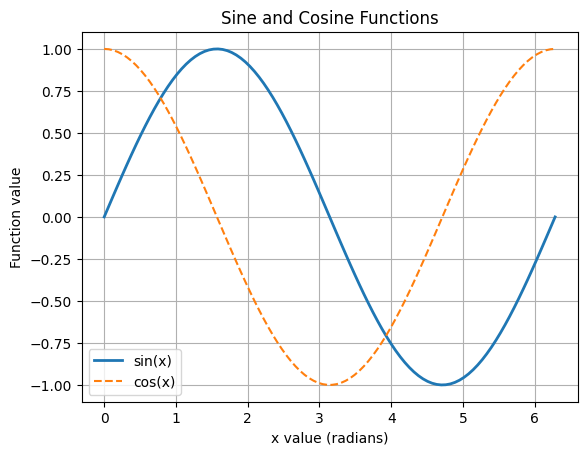

Plotting random scatter plot


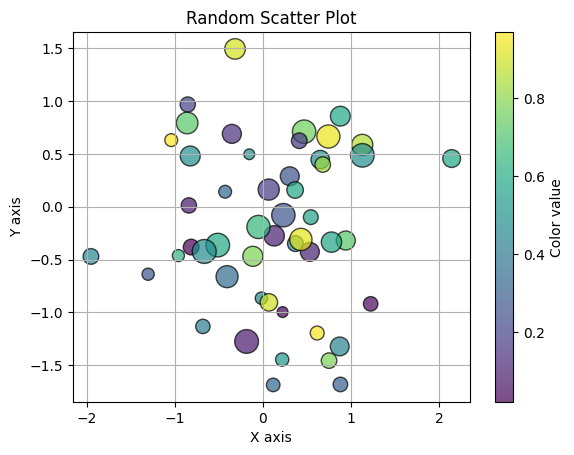

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Line Plot Example
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

print("Plotting sine and cosine curves")

plt.plot(x, y1, label="sin(x)", linewidth=2)
plt.plot(x, y2, label="cos(x)", linestyle="--")
plt.xlabel("x value (radians)")
plt.ylabel("Function value")
plt.title("Sine and Cosine Functions")
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot Example
rng = np.random.default_rng(42)
x_scatter = rng.normal(0, 1, 50)
y_scatter = rng.normal(0, 1, 50)
colors = rng.random(50)  # color value for each point
sizes = rng.integers(50, 300, size=50)  # size for each point

print("Plotting random scatter plot")

plt.scatter(x_scatter, y_scatter, c=colors, s=sizes, cmap='viridis', alpha=0.7, edgecolors='black')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Random Scatter Plot")
plt.colorbar(label="Color value")
plt.grid(True)
plt.show()


### Python Practice Exercises — Math Focus

These exercises combine concepts from variables, lists, flow control, functions, NumPy, and matplotlib.

1. **Factorial Function and Plot**  
   Write a function `factorial(n)` that computes  
   $$
   n! = \prod_{k=1}^n k
   $$
   for $n \geq 0$.  
   - Test your function for several values of $n$.  
   - Plot $n$ vs. $n!$ for $n = 0$ to $10$.

2. **Taylor Approximation of Sine**  
   Approximate $\sin(x)$ using the Taylor series expansion:  
   $$
   \sin(x) \approx \sum_{k=0}^n (-1)^k \frac{x^{2k+1}}{(2k+1)!}
   $$
   - Write a function `taylor_sin(x, n)` to compute the approximation.  
   - Plot the approximation and the true sine curve on the same graph for $x \in [-\pi, \pi]$ and various $n$.

3. **Dot Product and Angle Between Vectors**  
   Given two vectors $\mathbf{a}$ and $\mathbf{b}$, the angle between them is:  
   $$
   \theta = \cos^{-1} \left( \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} \right)
   $$
   - Use NumPy to compute $\theta$ for random 3D vectors.  
   - Repeat for 100 pairs and plot the distribution of angles as a histogram.

4. **Matrix Equation Solver**  
   Solve the linear system:  
   $$
   A\mathbf{x} = \mathbf{b}
   $$
   where $A$ is a $3 \times 3$ invertible matrix and $\mathbf{b}$ is a given vector.  
   - Use NumPy’s `np.linalg.inv` and `@` operator.  
   - Verify your solution by multiplying $A$ and $\mathbf{x}$ and checking against $\mathbf{b}$.

5. **Projectile Motion Simulation**  
   The height $h(t)$ of a projectile launched with velocity $v_0$ at angle $\theta$ is:  
   $$
   h(t) = v_0 \sin(\theta) t - \frac{1}{2} g t^2
   $$
   - Use a loop to compute $h(t)$ until the projectile hits the ground.  
   - Plot height vs. time and annotate the maximum height.

6. **Monte Carlo Estimate of $\pi$**  
   - Randomly generate $N$ points in the unit square $[0,1] \times [0,1]$.  
   - Count how many fall inside the quarter circle $x^2 + y^2 \leq 1$.  
   - Use the ratio to estimate $\pi$.  
   - Plot the points, coloring those inside and outside the circle differently.
